In [1]:
import yfinance as yf
import pandas as pd
import functions as f
import matplotlib.pyplot as plt
import numpy as np
# List of UK and international tickers for the portfolio

tickers = ['BP.L', 'VOD.L', 'ULVR.L', 'AZN.L', 'HSBA.L', 'AAPL', 'MSFT', 'GOOG', 'AMZN', 'JPM']


# Download adjusted close prices from Yahoo Finance for a 5-year range
data = yf.download(tickers, start="2018-01-01", end="2023-01-01")['Adj Close']

print(data.head())


[*********************100%***********************]  10 of 10 completed

Ticker                          AAPL       AMZN        AZN.L        BP.L  \
Date                                                                       
2018-01-02 00:00:00+00:00  40.568932  59.450500  4202.677734  355.833984   
2018-01-03 00:00:00+00:00  40.561863  60.209999  4252.896484  360.440857   
2018-01-04 00:00:00+00:00  40.750271  60.479500  4257.012695  364.428894   
2018-01-05 00:00:00+00:00  41.214230  61.457001  4284.180176  364.153931   
2018-01-08 00:00:00+00:00  41.061146  62.343498  4242.194336  362.641266   

Ticker                          GOOG      HSBA.L        JPM       MSFT  \
Date                                                                     
2018-01-02 00:00:00+00:00  53.119549  532.506348  88.566330  79.792915   
2018-01-03 00:00:00+00:00  53.991409  531.323181  88.656601  80.164276   
2018-01-04 00:00:00+00:00  54.186924  533.202393  89.926636  80.869804   
2018-01-05 00:00:00+00:00  54.976486  531.392761  89.349358  81.872459   
2018-01-08 00:00:00+00:

In [2]:
missing_data = data.isnull().sum()
print("Missing values per ticker:\n", missing_data)

Missing values per ticker:
 Ticker
AAPL      29
AMZN      29
AZN.L     25
BP.L      30
GOOG      29
HSBA.L    25
JPM       29
MSFT      29
ULVR.L    25
VOD.L     25
dtype: int64


In [3]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
# Total number of rows before dropping missing values
total_rows = data.shape[0]
print(f"Total number of trading days: {total_rows}")

# Sum of missing values across all tickers
total_missing = data.isnull().sum().sum()
print(f"Total missing values across all tickers: {total_missing}")

Total number of trading days: 1288
Total missing values across all tickers: 275


In [5]:
# Drop rows with any missing values
data_cleaned = data.dropna()
print(f"Number of trading days after dropping missing values: {data_cleaned.shape[0]}")

Number of trading days after dropping missing values: 1229


In [6]:
# Calculate the percentage of data retained after dropping missing values
data_cleaned = data.dropna()
retained_rows = data_cleaned.shape[0]
data_retained_percentage = (retained_rows / total_rows) * 100
print(f"Data retained after dropping missing values: {data_retained_percentage:.2f}%")

Data retained after dropping missing values: 95.42%


In [7]:
# Calculate daily returns
returns = data_cleaned.pct_change().dropna()

In [8]:
#Define periods per year for daily data
periods_per_year = 252

#Calculate annualized expected returns and covariance matrix
rets = f.annualize_rets(returns, periods_per_year)
cov_m = returns.cov() * periods_per_year

In [9]:
rets

Ticker
AAPL      0.267370
AMZN      0.073513
AZN.L     0.212611
BP.L      0.042309
GOOG      0.110468
HSBA.L   -0.039740
JPM       0.077085
MSFT      0.249691
ULVR.L    0.042722
VOD.L    -0.125908
dtype: float64

In [10]:
cov_m

Ticker,AAPL,AMZN,AZN.L,BP.L,GOOG,HSBA.L,JPM,MSFT,ULVR.L,VOD.L
Ticker,,,,,,,,,,
AAPL,0.116387,0.081095,0.012078,0.022509,0.075784,0.016221,0.051675,0.082936,0.010091,0.015681
AMZN,0.081095,0.132550,0.010072,0.009589,0.079550,0.010897,0.037558,0.081982,0.007723,0.012226
AZN.L,0.012078,0.010072,0.062565,0.016958,0.009480,0.014131,0.004619,0.013801,0.018287,0.018736
BP.L,0.022509,0.009589,0.016958,0.131359,0.023949,0.052782,0.056282,0.019424,0.012740,0.039328
GOOG,0.075784,0.079550,0.009480,0.023949,0.101044,0.017024,0.050413,0.080521,0.009887,0.021142
HSBA.L,0.016221,0.010897,0.014131,0.052782,0.017024,0.077444,0.045631,0.014886,0.013830,0.032300
JPM,0.051675,0.037558,0.004619,0.056282,0.050413,0.045631,0.106376,0.051289,0.009666,0.033888
MSFT,0.082936,0.081982,0.013801,0.019424,0.080521,0.014886,0.051289,0.099071,0.011792,0.017485
ULVR.L,0.010091,0.007723,0.018287,0.012740,0.009887,0.013830,0.009666,0.011792,0.047697,0.019138


In [11]:
risk_free_rate = 0.03

In [12]:
optimal_weights_msr = f.msr(risk_free_rate, rets, cov_m)
print("Optimal weights for maximum Sharpe ratio portfolio:", optimal_weights_msr)

Optimal weights for maximum Sharpe ratio portfolio: [2.44209220e-01 0.00000000e+00 5.49171288e-01 0.00000000e+00
 1.48237542e-16 1.06549969e-16 9.98279150e-17 2.06619493e-01
 9.76866157e-17 0.00000000e+00]


In [13]:
optimal_weights_gmv = f.gmv(cov_m)
print("Optimal weights for global minimum variance portfolio:", optimal_weights_gmv)

Optimal weights for global minimum variance portfolio: [2.82200084e-02 7.54282000e-02 2.25427802e-01 1.86685020e-02
 5.54644105e-02 1.30735717e-01 4.40341377e-02 7.68428290e-18
 3.41925779e-01 8.00954442e-02]


In [14]:
n_points = 100
# Calculate annualized expected returns and covariance matrix
rets = f.annualize_rets(returns, periods_per_year)
cov_m = returns.cov() * periods_per_year

# Optimal Weights for MSR and GMV
optimal_weights_msr = f.msr(risk_free_rate, rets, cov_m)
optimal_weights_gmv = f.gmv(cov_m)

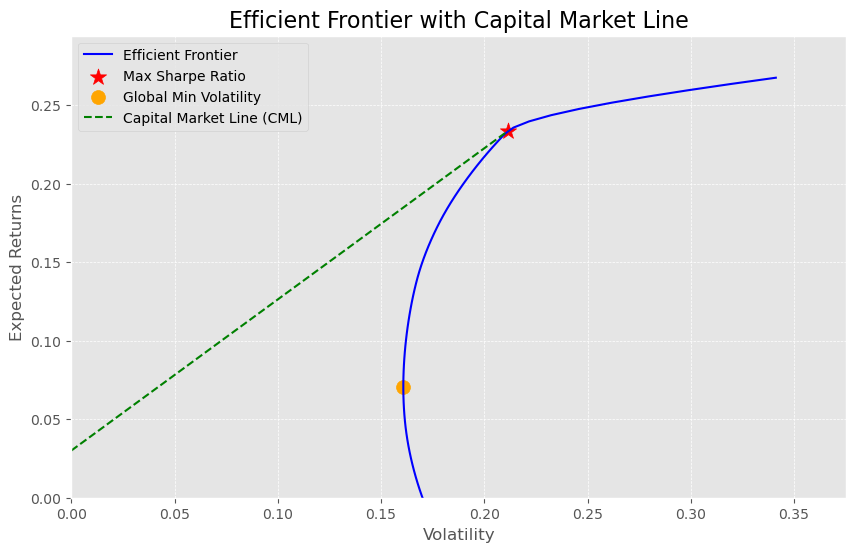

In [32]:
# Step 1: Calculate Efficient Frontier Points Manually
target_returns = np.linspace(rets.min(), rets.max(), n_points)
frontier_vols = []
frontier_returns = []

for target_return in target_returns:
    weights = f.minimize_vol(target_return, rets, cov_m)
    vol = f.portfolio_vol(weights, cov_m)
    ret = f.portfolio_return(weights, rets)
    frontier_vols.append(vol)
    frontier_returns.append(ret)

# Step 2: Calculate Max Sharpe Ratio (MSR) and Global Minimum Variance (GMV) Portfolio Points
optimal_weights_msr = f.msr(risk_free_rate, rets, cov_m)
optimal_weights_gmv = f.gmv(cov_m)

msr_volatility = f.portfolio_vol(optimal_weights_msr, cov_m)
msr_return = f.portfolio_return(optimal_weights_msr, rets)
gmv_volatility = f.portfolio_vol(optimal_weights_gmv, cov_m)
gmv_return = f.portfolio_return(optimal_weights_gmv, rets)

# Step 3: Plot Efficient Frontier and Portfolios
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the efficient frontier
ax.plot(frontier_vols, frontier_returns, linestyle='-', color='blue', label="Efficient Frontier")

# Plot MSR and GMV portfolios with custom markers
plt.scatter(msr_volatility, msr_return, color="red", marker="*", s=150, label="Max Sharpe Ratio")
plt.scatter(gmv_volatility, gmv_return, color="orange", marker="o", s=100, label="Global Min Volatility")

# Plot Capital Market Line (CML)
cml_x = [0, msr_volatility]
cml_y = [risk_free_rate, msr_return]
plt.plot(cml_x, cml_y, color="green", linestyle="--", linewidth=1.5, label="Capital Market Line (CML)")

# Set axis labels, title, and legend
ax.set_title("Efficient Frontier with Capital Market Line", fontsize=16)
ax.set_xlabel("Volatility", fontsize=12)
ax.set_ylabel("Expected Returns", fontsize=12)
ax.legend(loc="upper left")
ax.grid(True, linestyle='--', linewidth=0.5)

# Set limits for better visualization (adjust as needed)
ax.set_xlim(0, max(frontier_vols) * 1.1)
ax.set_ylim(0, max(frontier_returns) * 1.1)

# Show the plot
plt.show()